# Clasificación Iris

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
X = iris.data[:,:2]
y = iris.target

X_min = X[:,0].min() - 1
X_max = X[:,0].max() + 1
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

h = (X_max - X_min)/100

xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

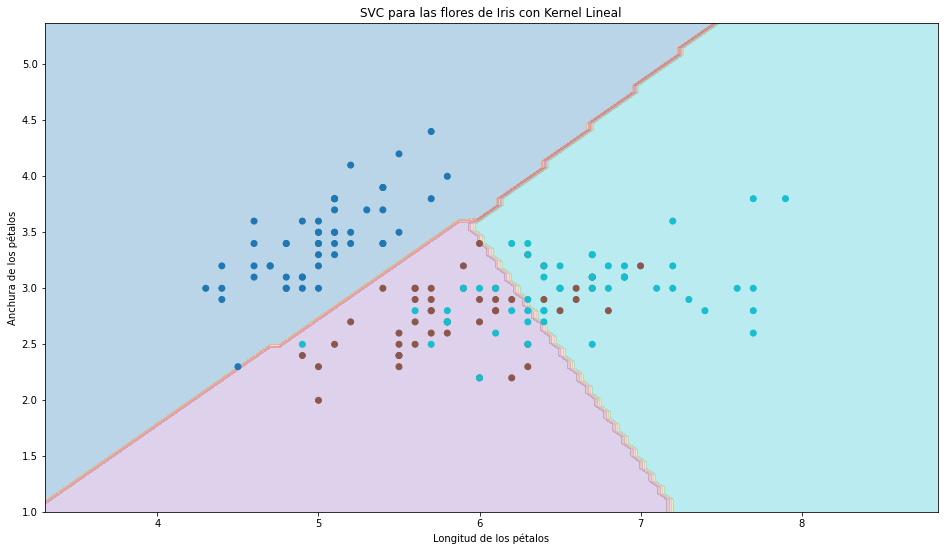

In [4]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,y)
y_pred = svc.predict(X_plot)
y_pred = y_pred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx,yy,y_pred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.tab10);
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal");

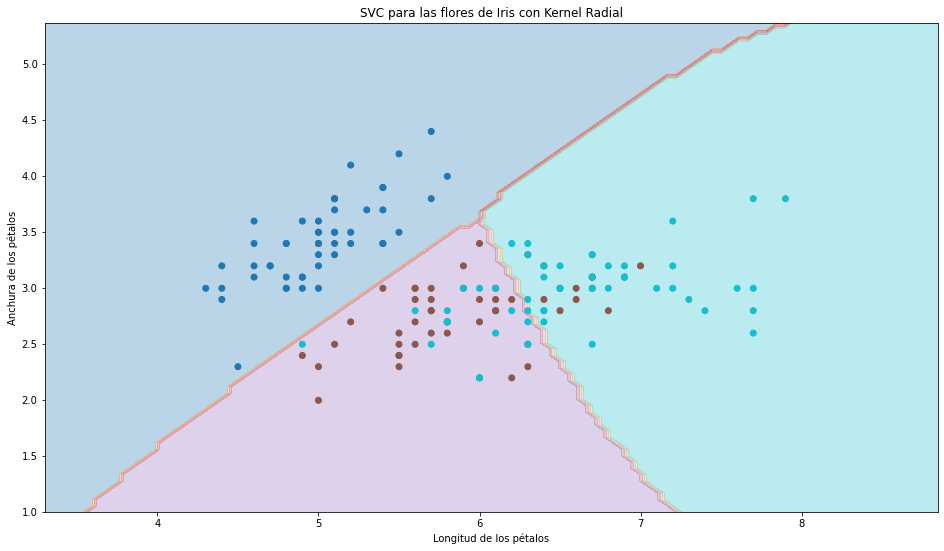

In [5]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,y)
y_pred = svc.predict(X_plot)
y_pred = y_pred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx,yy,y_pred, cmap=plt.cm.tab10, alpha = 0.3);
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial");

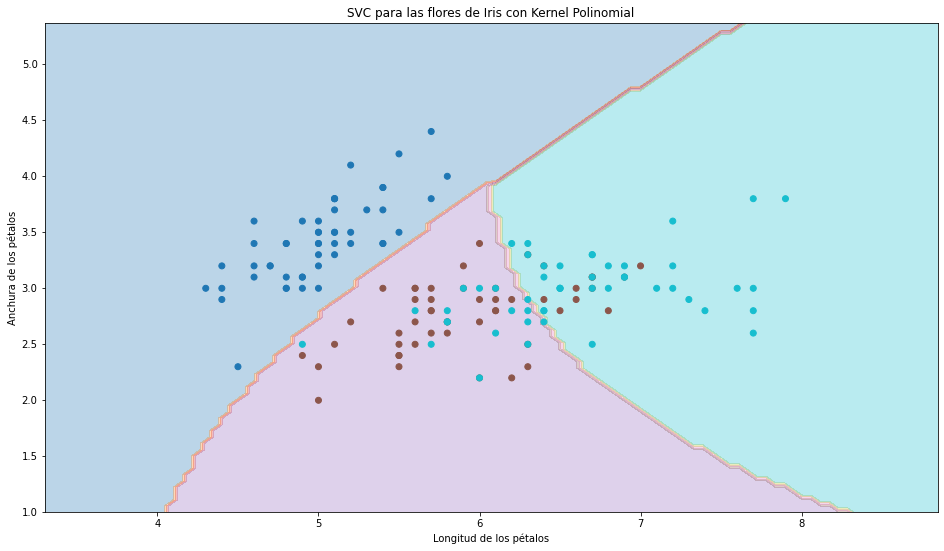

In [6]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,y)
y_pred = svc.predict(X_plot)
y_pred = y_pred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,y_pred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.tab10);
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Polinomial");

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.utils import shuffle 

In [8]:
"""
1. Hacemos Cross Validation a nuestros datos de entrenamiento y test por medio de Stratified K-Fold
2. Printeamos para saber si la distribución fue la correcta
"""

import pandas as pd

X = pd.DataFrame(X)
y = pd.DataFrame(y)

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

for train, test in skf.split(X,y):

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]


display(f'Datos de entrenamiento de X: {len(X_train)}')
display(f'Datos de prueba de X: {len(X_test)}')
display(f'Datos de entrenamiento de Y: {len(y_train)}')
display(f'Datos de prueba de Y: {len(y_test)}')

'Datos de entrenamiento de X: 113'

'Datos de prueba de X: 37'

'Datos de entrenamiento de Y: 113'

'Datos de prueba de Y: 37'

In [9]:
# Grilla de parámetros
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [10]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), scoring='accuracy', param_grid=parameters, cv=skf)
clf = clf.fit(X_train, y_train)

In [11]:
# Mejores parámetros
clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [12]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']

for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.511 (+/-0.401) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.511 (+/-0.401) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.663 (+/-0.154) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.779 (+/-0.061) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.770 (+/-0.064) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.752 (+/-0.075) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.511 (+/-0.401) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.663 (+/-0.154) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.779 (+/-0.061) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.734 (+/-0.112) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.734 (+/-0.112) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.743 (+/-0.110) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.663 (+/-0.154) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.788 (+/-0.051) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.752 (+/-0.075) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.751 (+/-0.138) para {'C': 100, 'gamma'

In [13]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor","Virgínica"]))

              precision    recall  f1-score   support

      Setosa       0.86      1.00      0.92        12
  Versicolor       0.69      0.85      0.76        13
   Virgínica       0.86      0.50      0.63        12

    accuracy                           0.78        37
   macro avg       0.80      0.78      0.77        37
weighted avg       0.80      0.78      0.77        37



In [14]:
best_est = clf.best_estimator_
score = clf.best_score_
print(score)

0.7875615763546797


In [15]:
best_model = clf.cv_results_['mean_test_score']
best_model = best_model.mean()
print(best_model)

0.7109759852216749


In [16]:
resultados = cross_val_score(best_est, X_train, y_train, cv=skf, scoring='r2').mean()
display(f'Cross Validation del modelo: {resultados*100:.2f}%')

'Cross Validation del modelo: 68.35%'